In [87]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_excel('Dataset/energy-efficiency.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


#### Renaming features

In [89]:
df.columns = ['RC','SA','WA','RA','OH','OR','GA','GAD','HL','CL']
features = ['RC','SA','WA','RA','OH','OR','GA','GAD']
targetHL = ['HL']
targetCL = ['CL']

In [90]:
df.head(20)

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Predicting the Heating Load feature

In [91]:
X = df[features]
y = df[targetHL]

#### Learning curve

In [92]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
def plot_learning_curve(estimator,X,y,train_sizes = [1,16,64,128,512]):
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,train_sizes = train_sizes,cv=5)

    mean_train_score = -np.mean(train_scores,axis=1)
    mean_test_score = -np.mean(test_scores,axis=1)

    plt.figure(figsize = (15,5))
    plt.xlabel('training size')
    plt.ylabel('MSE')
    plt.plot(train_sizes,mean_train_score,'x-',color='r',label="Training score")
    plt.plot(train_sizes,mean_test_score,'x-',color='g',label="Cross-validation score")
    plt.legend(loc='best')
    plt.show()

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


#### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9120059666279607

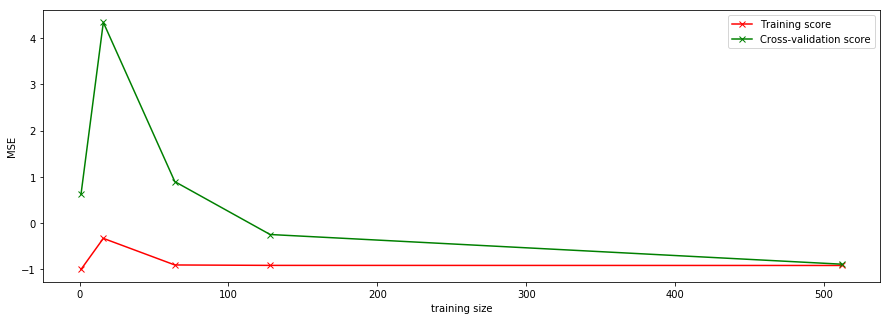

In [95]:
plot_learning_curve(model,X,y)

#### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.9974553583093854

#### Visualize the output

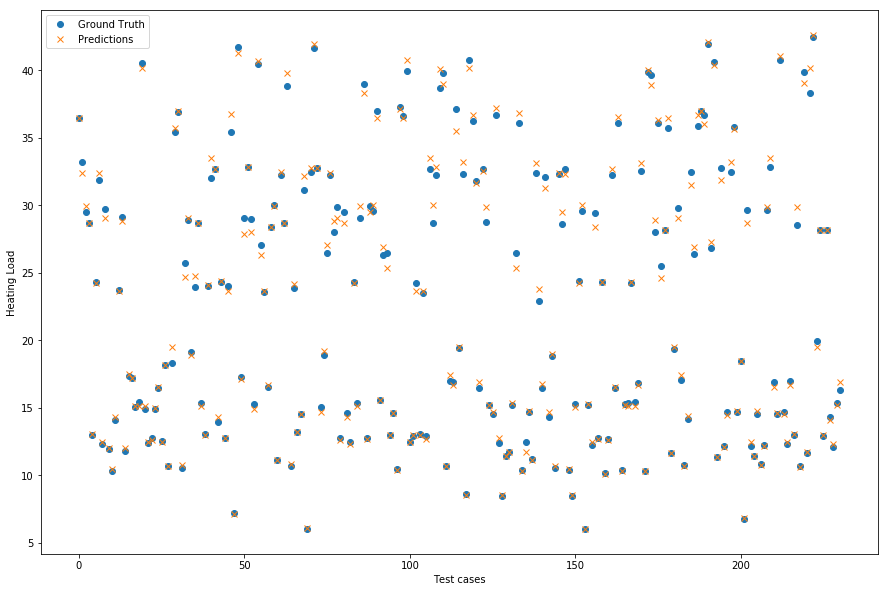

In [97]:
plt.figure(figsize = (15,10))
plt.plot(range(0,len(X_test)),y_test,'o',label = 'Ground Truth')
plt.plot(range(0,len(X_test)),predictions,'x',label = 'Predictions')
plt.xlabel('Test cases')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

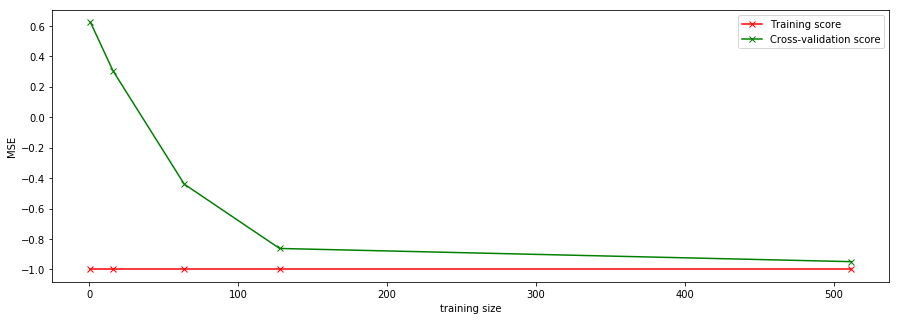

In [98]:
plot_learning_curve(model,X,y)

Looks like there's very less variance. And the error is very low.

### Predicting the Cooling Load feature

In [99]:
y = df[targetCL]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Linear Regression

In [100]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9075249136952758

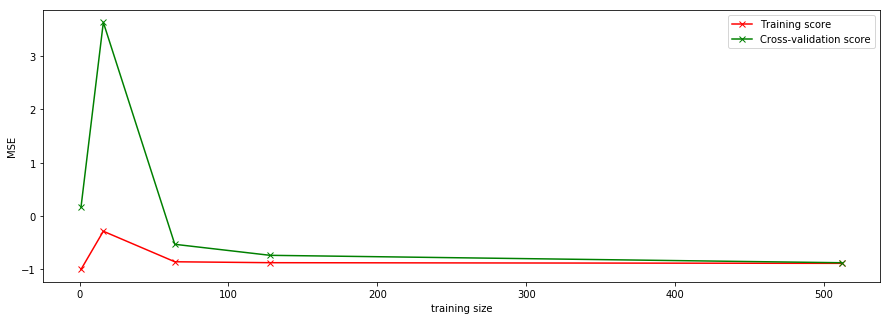

In [101]:
plot_learning_curve(model,X,y)

#### Decision Tree

In [102]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.9619688807501418

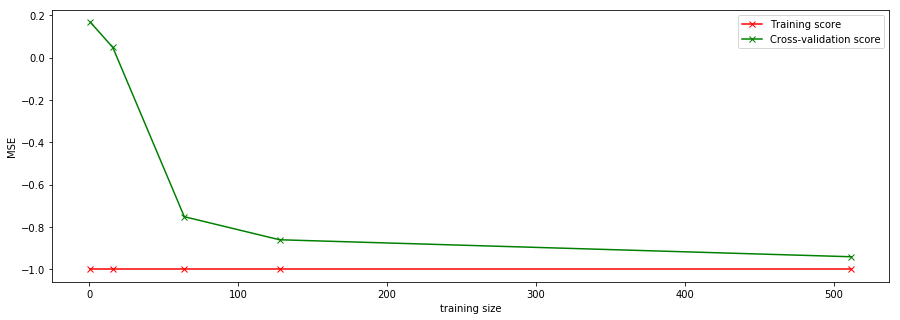

In [103]:
plot_learning_curve(model,X,y)

#### Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train,y_train.values.ravel())
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.9780834654580429

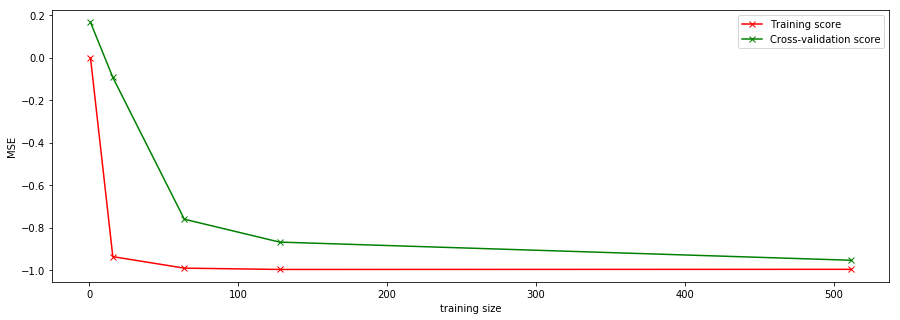

In [105]:
plot_learning_curve(model,X,y.values.ravel())

#### Visualize the output

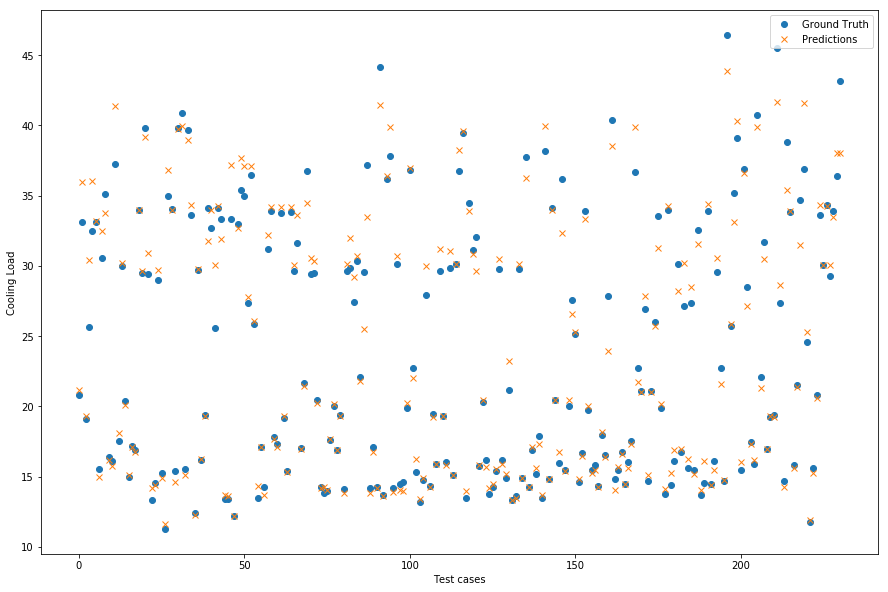

In [106]:
plt.figure(figsize = (15,10))
plt.plot(range(0,len(X_test)),y_test,'o',label = 'Ground Truth')
plt.plot(range(0,len(X_test)),predictions,'x',label = 'Predictions')
plt.xlabel('Test cases')
plt.ylabel('Cooling Load')
plt.legend()
plt.show()